In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load Dataset
df = pd.read_csv('TASK-ML-INTERN.csv')

In [3]:
# Inspect Data
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  

In [4]:
# Handle Missing Values
df = df.dropna()  # Drop rows with missing values

In [9]:
# Convert categorical columns to numeric (if any)
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [10]:
# Ensure Target is numeric
df['vomitoxin_ppb'] = pd.to_numeric(df['vomitoxin_ppb'], errors='coerce')

In [11]:
# Separate Features and Target
X = df.drop(columns=['vomitoxin_ppb'])  # Features (Spectral Data)
y = df['vomitoxin_ppb']  # Target (DON Concentration)

In [12]:
# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

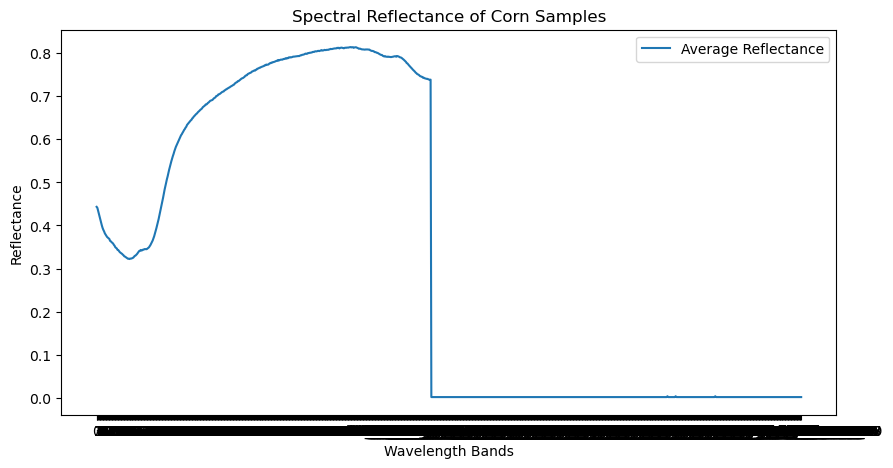

In [13]:
# Visualize Spectral Data
plt.figure(figsize=(10, 5))
plt.plot(X.columns, X.mean(), label='Average Reflectance')
plt.xlabel('Wavelength Bands')
plt.ylabel('Reflectance')
plt.legend()
plt.title('Spectral Reflectance of Corn Samples')
plt.show()

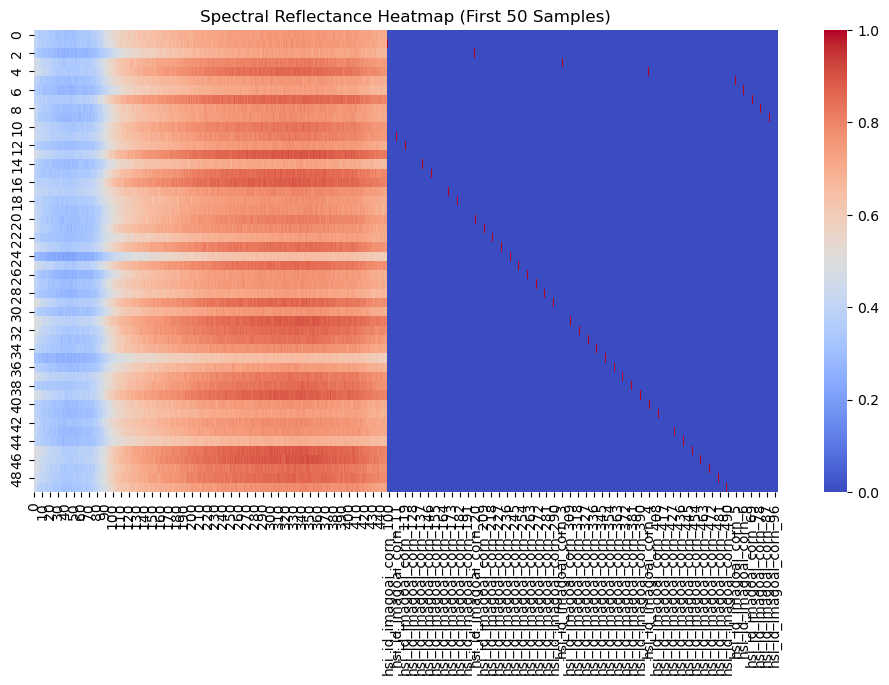

In [14]:
# Heatmap of Sample Spectral Data
plt.figure(figsize=(12, 6))
sns.heatmap(X.iloc[:50], cmap='coolwarm', xticklabels=10)
plt.title('Spectral Reflectance Heatmap (First 50 Samples)')
plt.show()

In [15]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.41431143 0.02881941]


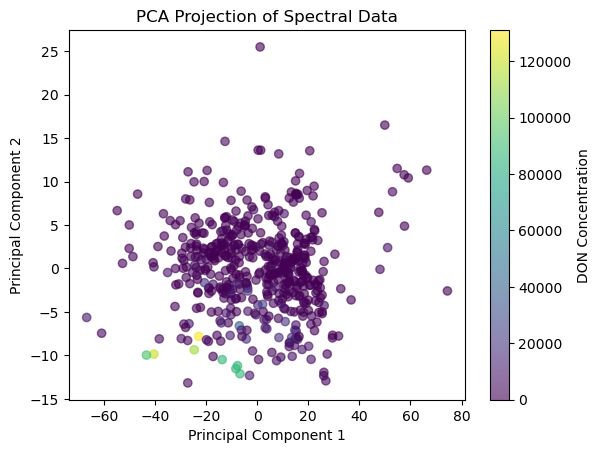

In [16]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Spectral Data')
plt.colorbar(label='DON Concentration')
plt.show()

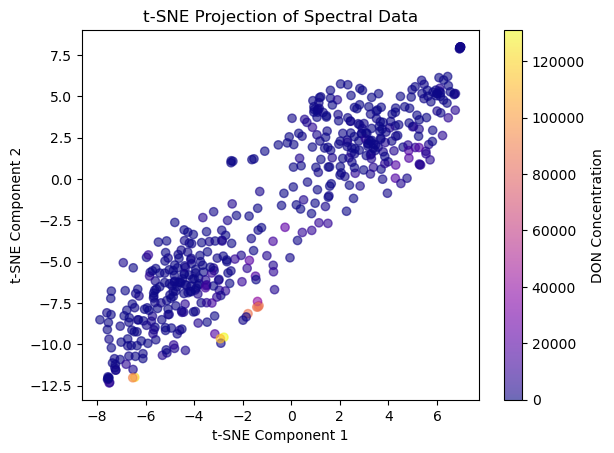

In [17]:
# t-SNE for Visualization
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Spectral Data')
plt.colorbar(label='DON Concentration')
plt.show()

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [20]:
# Predictions
y_pred = best_model.predict(X_test)

In [21]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, RMSE: {rmse}, R² Score: {r2}')

MAE: 3951.8036002564104, RMSE: 11630.514962943833, R² Score: 0.5160899656876773


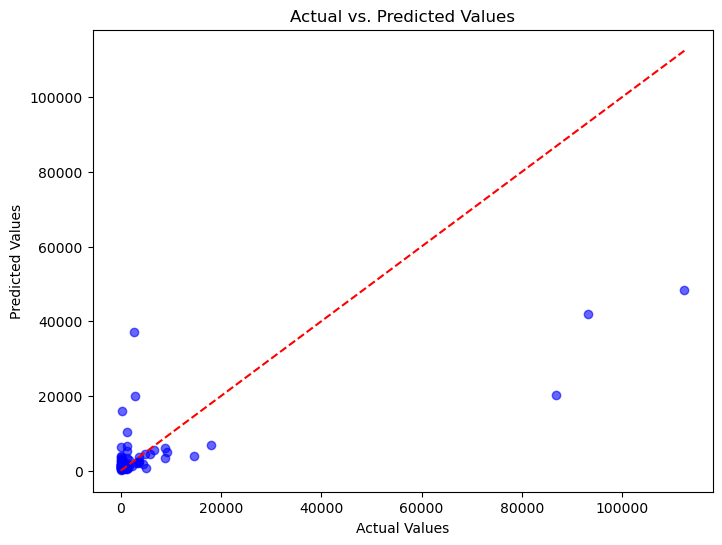

In [22]:
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [23]:
# Summarize Model Performance and Limitations
print("\nModel Performance Summary:")
print("- The model achieved an R² score of {:.3f}, indicating {:.1f}% of variance explained.".format(r2, r2*100))
print("- The RMSE value suggests an average prediction error of {:.3f}.".format(rmse))
print("- Limitations: The model might be sensitive to noise in spectral data or require more complex feature extraction techniques to improve accuracy.")



Model Performance Summary:
- The model achieved an R² score of 0.516, indicating 51.6% of variance explained.
- The RMSE value suggests an average prediction error of 11630.515.
- Limitations: The model might be sensitive to noise in spectral data or require more complex feature extraction techniques to improve accuracy.


In [27]:
!pip install xgboost


/Users/aakarshdawar/.zshenv:export:1: not valid in this context: Plug-Ins/JavaAppletPlugin.plugin/Contents/Home
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:0000:0100:01


In [28]:
# Using XG Boost
from xgboost import XGBRegressor
param_grid = {
'n_estimators': [100, 200, 300],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 5, 7],
'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [29]:
# Predictions
y_pred = best_model.predict(X_test)

In [30]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, RMSE: {rmse}, R² Score: {r2}')

MAE: 4246.075632171631, RMSE: 13173.610797663712, R² Score: 0.3791647093762307


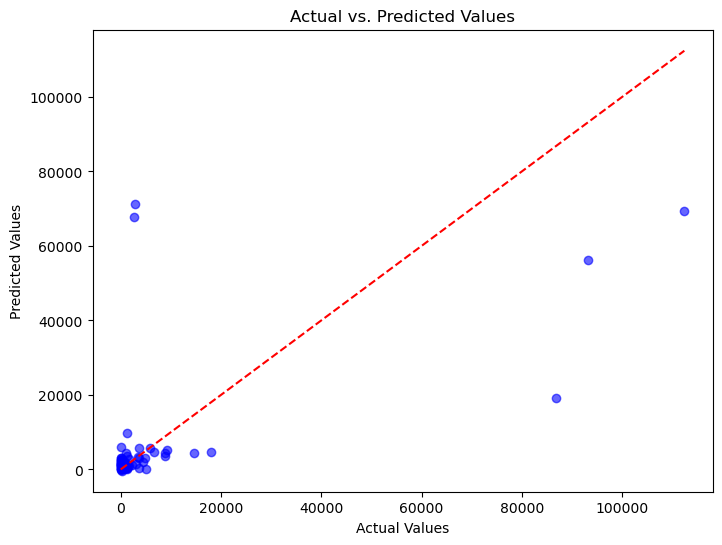

In [31]:
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [32]:
# Summarize Model Performance and Limitations
print("\nModel Performance Summary:")
print("- The model achieved an R² score of {:.3f}, indicating {:.1f}% of variance explained.".format(r2, r2*100))
print("- The RMSE value suggests an average prediction error of {:.3f}.".format(rmse))
print("- Limitations: The model might be sensitive to noise in spectral data or require more complex feature extraction techniques to improve accuracy.")



Model Performance Summary:
- The model achieved an R² score of 0.379, indicating 37.9% of variance explained.
- The RMSE value suggests an average prediction error of 13173.611.
- Limitations: The model might be sensitive to noise in spectral data or require more complex feature extraction techniques to improve accuracy.
